# Project Overview

This dataset provides insights into customer satisfaction levels within an undisclosed airline company. The optimal goal is to examine the quality and satisfaction rates in this database.

To further understand the objective behind the project, we can divide the flying experience to three main sections:

1. Pre-flight 
2. During flight
3. Post-flight

The main focus is to analyze the flight experience in the during phase and the following questions will be answered to guide the analysis of the report:

1. How is satisfaction affected by class?
2. How is satisfaction affected by entertainment?
3. How is satisfaction affected by food?
4. How is satisfaction affected by distance?

# 1. Importing Dependencies

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Reading the csv file

In [28]:
df = pd.read_csv(r"Airline_customer_satisfaction.csv")

# 3. EDA

In [29]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [31]:
df.shape

(129880, 22)

In [32]:
df.describe().round()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129880.0,129487.0
mean,39.0,1981.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,15.0,15.0
std,15.0,1027.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,38.0
min,7.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,27.0,1359.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,40.0,1925.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0
75%,51.0,2544.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,12.0,13.0
max,85.0,6951.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


# 4. Data cleaning

In [33]:
# removing unwanted features
df.drop(["Departure/Arrival time convenient", 
         "Gate location", 
         "Online support", 
         "Ease of Online booking", 
         "On-board service", 
         "Baggage handling", 
         "Checkin service", 
         "Online boarding", 
         "Arrival Delay in Minutes"], 
        axis=1, inplace=True)

# 5. Satisfaction and Class Analysis

In [34]:
df[['satisfaction', 'Class']]

,satisfaction,Class
0,satisfied,Eco
1,satisfied,Business
2,satisfied,Eco
3,satisfied,Eco
4,satisfied,Eco
...,...,...
129875,satisfied,Eco
129876,dissatisfied,Business
129877,dissatisfied,Eco
129878,dissatisfied,Eco


In [35]:
Satisfaction_Class_Matrix = pd.crosstab(df['Class'], df['satisfaction'])
Satisfaction_Class_Matrix

satisfaction,dissatisfied,satisfied
Class,,
Business,18065,44095
Eco,35336,22973
Eco Plus,5392,4019


## Heatmap

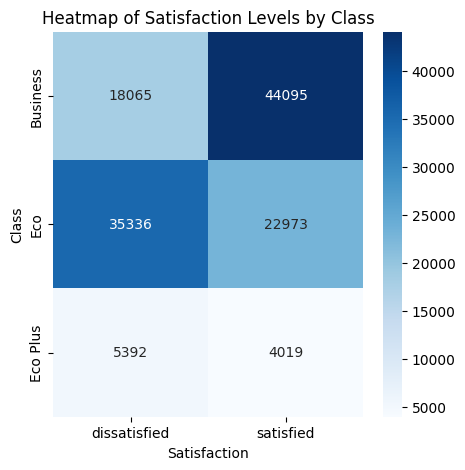

In [10]:
plt.figure(figsize = (5, 5))
sns.heatmap(Satisfaction_Class_Matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')

# annot stands for annotations
# fmt stands for format
# cmap stands for color 

plt.title('Heatmap of Satisfaction Levels by Class')
plt.xlabel('Satisfaction')
plt.ylabel('Class')
plt.savefig('heatmap_colormaps.png', format = 'png', dpi = 2000)
plt.show()

## Count Plot

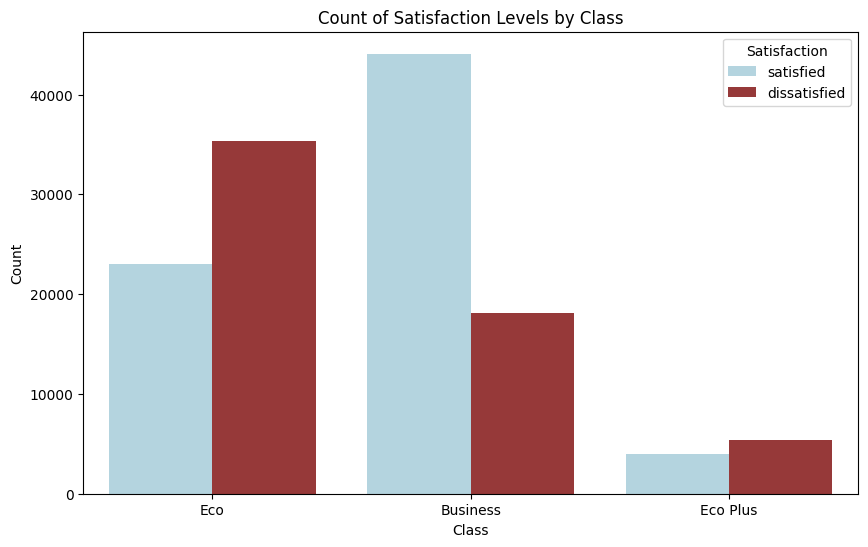

In [11]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df,
              x = 'Class',
              hue = 'satisfaction',
              palette = {"dissatisfied": "Brown", "satisfied": "LightBlue"})

plt.title('Count of Satisfaction Levels by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title = 'Satisfaction')
plt.savefig('Count_of_Satisfaction_Levels_by_Class.png', format = 'png', dpi = 2000)
plt.show()

# 6. Satisfaction and Food Analysis

In [36]:
df2 = df[['satisfaction', 'Food and drink']]

In [37]:
# Since the Food and drink column is a rating from 1 to 5, let us remove any 0 rating
filtered_df = df2.loc[df2['Food and drink'] != 0]
filtered_df

,satisfaction,Food and drink
90,satisfied,1
91,satisfied,1
92,satisfied,1
173,satisfied,1
174,satisfied,1
...,...,...
129875,satisfied,5
129876,dissatisfied,2
129877,dissatisfied,3
129878,dissatisfied,3


## Histogram

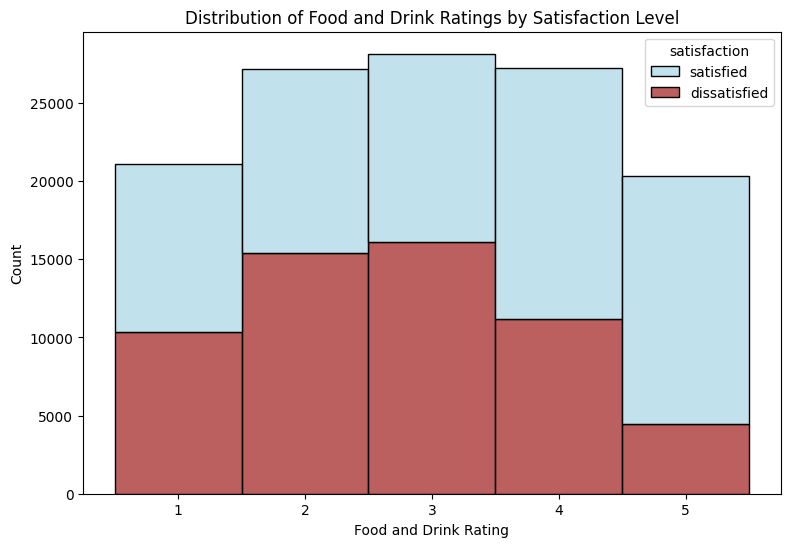

In [14]:
plt.figure(figsize = (9, 6))

# Use numpy to define bin edges
bin_edges = np.arange(0.5, 6.5, 1)  # Create bins that are centered around integers
sns.histplot(data = filtered_df, 
             x = 'Food and drink', 
             hue = 'satisfaction', 
             multiple = 'stack', 
             palette = {"dissatisfied": "Brown", "satisfied": "LightBlue"}, 
             bins = bin_edges)

plt.title('Distribution of Food and Drink Ratings by Satisfaction Level')
plt.xlabel('Food and Drink Rating')
plt.ylabel('Count')
plt.xticks(ticks = np.arange(1, 6, 1))  # Set x-axis ticks to whole numbers
plt.savefig('Distribution_of_Food_and_Drink_Ratings_by_Satisfaction_Level.png', format = 'png', dpi = 2000)
plt.show()

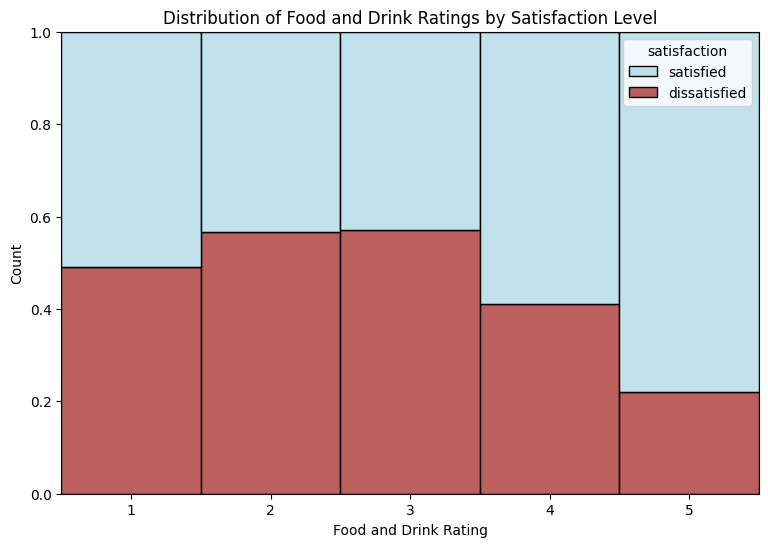

In [15]:
plt.figure(figsize = (9, 6))

# Use numpy to define bin edges
bin_edges = np.arange(0.5, 6.5, 1)  # Create bins that are centered around integers
sns.histplot(data = filtered_df, 
             x = 'Food and drink', 
             hue = 'satisfaction', 
             multiple = 'fill', 
             palette = {'dissatisfied': 'Brown', 'satisfied': 'LightBlue'}, 
             bins = bin_edges)

plt.title('Distribution of Food and Drink Ratings by Satisfaction Level')
plt.xlabel('Food and Drink Rating')
plt.ylabel('Count')
plt.xticks(ticks = np.arange(1, 6, 1))  # Set x-axis ticks to whole numbers
plt.savefig('Distribution_of_Food_and_Drink_Ratings_by_Satisfaction_Level_fill.png', format = 'png', dpi = 2000)
plt.show()

## Heatmap

In [38]:
Satisfaction_Food_Matrix = pd.crosstab(filtered_df['Food and drink'], df['satisfaction'])
Satisfaction_Food_Matrix

satisfaction,dissatisfied,satisfied
Food and drink,,
1,10361,10715
2,15406,11740
3,16088,12062
4,11153,16063
5,4473,15874


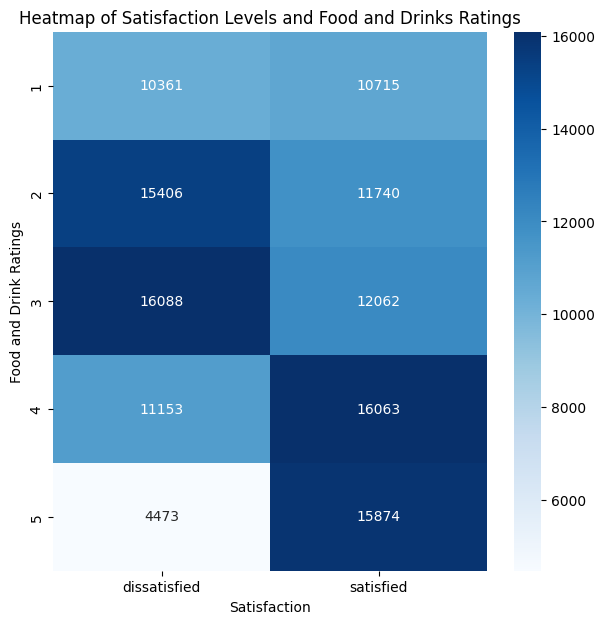

In [17]:
plt.figure(figsize = (7, 7))
sns.heatmap(Satisfaction_Food_Matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')

plt.title('Heatmap of Satisfaction Levels and Food and Drinks Ratings')
plt.xlabel('Satisfaction')
plt.ylabel('Food and Drink Ratings')
plt.savefig('heatmap_food_colormaps.png', format = 'png', dpi = 2000)
plt.show()

# 7. Satisfaction and Flight Distance Analysis

In [39]:
filtered_df = df[['satisfaction' ,'Flight Distance']].set_index('satisfaction')
filtered_df

,Flight Distance
satisfaction,
satisfied,265
satisfied,2464
satisfied,2138
satisfied,623
satisfied,354
...,...
satisfied,1731
dissatisfied,2087
dissatisfied,2320


In [40]:
df['Flight Distance'].dtype

dtype('int64')

In [41]:
df['Flight Distance'].value_counts()

Flight Distance
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: count, Length: 5398, dtype: int64

## Swarmplot

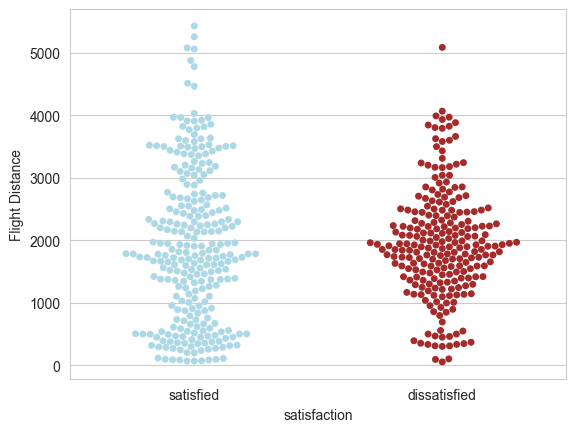

In [46]:
df_sample = df.sample(500)

sns.set_style('whitegrid')
sns.swarmplot(data = df_sample,
              y = 'Flight Distance',
              x = 'satisfaction',
              hue = 'satisfaction',
              palette = {'dissatisfied': 'Brown', 'satisfied': 'LightBlue'})
plt.savefig('Distribution_of_Satisfaction_Levels_and_Flight_Distance.png', format = 'png', dpi = 2000)
plt.show()

## Histogram

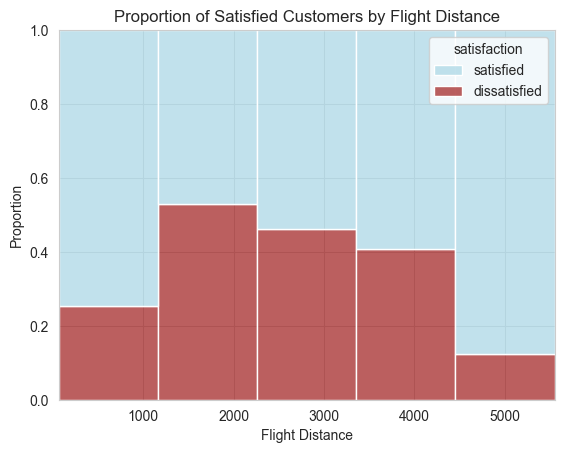

In [43]:
sns.set_style('whitegrid')
plot1 = sns.histplot(data = df_sample,
                     x = 'Flight Distance', 
                     hue = 'satisfaction',
                     multiple = 'fill',
                     palette = {'dissatisfied': 'Brown', 'satisfied': 'LightBlue'},
                     binwidth = 1000)

plt.title('Proportion of Satisfied Customers by Flight Distance')
plot1.set_ylabel('Proportion')
plt.savefig('Proportion_of_Satisfied_Customers_by_Flight_Distance.png', format = 'png', dpi = 2000)
plt.show()

# 8. Satisfaction and Enterntainment Analysis

In [26]:
filtered_df = df[['satisfaction','Inflight entertainment']]

# Since the Inflight entertainment column is a rating from 1 to 5, let us remove any 0 rating
filtered_df2 = filtered_df.loc[filtered_df['Inflight entertainment'] != 0]
filtered_df2

,satisfaction,Inflight entertainment
0,satisfied,4
1,satisfied,2
3,satisfied,4
4,satisfied,3
6,satisfied,5
...,...,...
129875,satisfied,5
129876,dissatisfied,1
129877,dissatisfied,2
129878,dissatisfied,2


<Figure size 1000x1000 with 0 Axes>

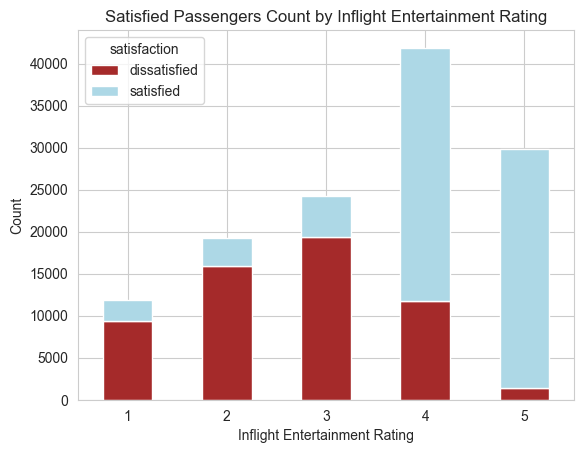

In [27]:
filtered_grouped_df2 = filtered_df2.groupby(['Inflight entertainment', 'satisfaction']).size().unstack()

plt.figure(figsize = (10, 10))
filtered_grouped_df2.plot(kind = 'bar',
                          stacked = True,
                          color = ['Brown', 'LightBlue'])

plt.title('Satisfied Passengers Count by Inflight Entertainment Rating')
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.savefig('Satisfied_Passengers_Count_by_Inflight_Entertainment_Rating.png', format = 'png', dpi = 2000)
plt.show()

<Figure size 1000x1500 with 0 Axes>

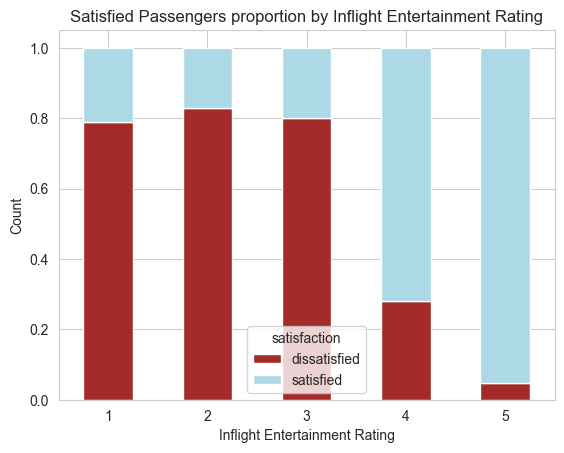

In [28]:
proportions_df2 = filtered_grouped_df2.div(filtered_grouped_df2.sum(axis = 1), axis = 0)

plt.figure(figsize = (10, 15))
proportions_df2.plot(kind = 'bar',
                             stacked = True,
                             color = ['Brown', 'LightBlue'])

plt.title('Satisfied Passengers proportion by Inflight Entertainment Rating')
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('Satisfied_Passengers_proportion_by_Inflight_Entertainment_Rating.png', format = 'png', dpi = 2000)
plt.show()

# 9. Extended Analysis

## Model Overview

**Objective**</br>
The objective is to develop a robust predictive model for estimating departure time delays based on the distance of the flight.

**Notes and Limitations**</br>
While the model demonstrates proficiency in predicting departure time delays, several factors may limit its effectiveness. These include the reliance on a sample of the dataset for training, which may not fully capture the variability of the full dataset. Moreover, the distribution of data points suggests that, for most flight distances, delays are minimal, making the predicted values more indicative of potential delays rather than definitive outcomes.

The z-score normalization is not utilize to construct the model due to the significant variability between the range of the feature and the target, as they might prevent convergece of the gradient descent or demand more computing power through more iterations, yet it is a demonstration of the possibilities for this model.

## Reading the Dataset

In [29]:
df = pd.read_csv(r'Airline_customer_satisfaction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

## Sampling and Data Preprocessing

In [30]:
df = df[['Departure Delay in Minutes','Flight Distance']]
df = df.sample(1000)

## Data Visualization

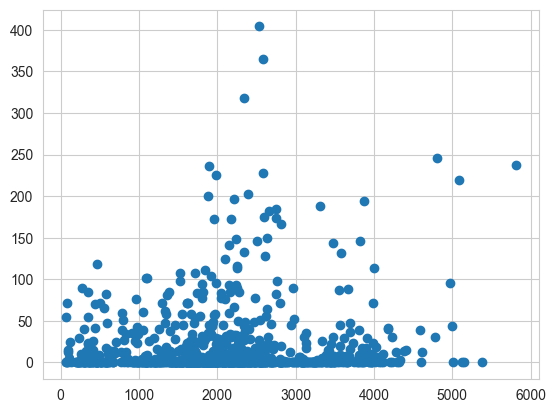

In [31]:
plt.scatter(x = df['Flight Distance'], y = df['Departure Delay in Minutes'])

## Standardization of data

### Z-Score Normalization

In [32]:
df['Departure Delay in Minutes NORM'] = (df['Departure Delay in Minutes'] - df['Departure Delay in Minutes'].mean()) / df['Departure Delay in Minutes'].std()

In [33]:
df['Flight Distance NORM'] = (df['Flight Distance'] - df['Flight Distance'].mean()) / df['Flight Distance'].std()

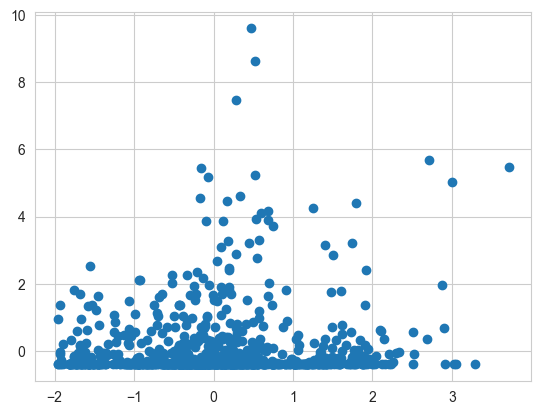

In [34]:
plt.scatter(x = df['Flight Distance NORM'], y = df['Departure Delay in Minutes NORM'])

### Min-Max Normalization

In [35]:
df['Departure Delay in Minutes MAX'] = df['Departure Delay in Minutes'] / df['Departure Delay in Minutes'].max()

In [36]:
df['Flight Distance MAX'] = df['Flight Distance'] / df['Flight Distance'].max()

Text(0, 0.5, 'Departure Delay in Minutes (Standardized)')

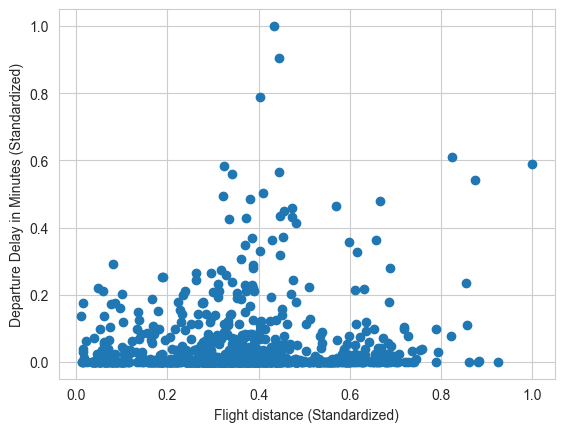

In [37]:
plt.scatter(x = df['Flight Distance MAX'], y = df['Departure Delay in Minutes MAX'])
plt.xlabel('Flight distance (Standardized)')
plt.ylabel('Departure Delay in Minutes (Standardized)')

## Cost Function Calculation

In [38]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0

    # summation
    h = 0
    
    for i in range(m):
            h += ((((w*(x.iloc[i]))+b)-(y.iloc[i]))**2)

    # finalisation equation
    total_cost = (1/(2*m))*h
    
    
    return total_cost

## Differentiation and Gradient Calculation

In [39]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    # summation for b
    hb = 0 
    
    for i in range(m):
        hb += (((w*(x.iloc[i]))+b)-(y.iloc[i]))

    # rest of equation
    dj_db = (1/m)*hb
    
    
    # summation for w
    hw = 0
    
    for i in range(m):
        hw += (((w*(x.iloc[i]))+b)-(y.iloc[i]))*(x.iloc[i])

    # rest of equation
    dj_dw = (1/m)*hw  

        
    return dj_dw, dj_db

## Gradient Descent

In [40]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    
    # Storing data for learning curve plot
    yplot = []
    xplot = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        # Update the parameters
        w_temp = w - alpha * dj_dw
        b_temp = b - alpha * dj_db

        w = w_temp
        b = b_temp

        # printing the cost every 10 iterations
        if i % 10 == 0:
            cost = compute_cost(x, y, w, b)
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")
            yplot.append(cost)
            xplot.append(i)
            
    plt.plot(xplot, yplot)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Learning Curve")
    plt.show()

    return w, b, yplot, xplot

## Defining Training Data

In [41]:
x = df['Flight Distance MAX']
y = df['Departure Delay in Minutes MAX']

## Initial values of w and b

In [42]:
w = 0
b = 0

## Inserting the Learning Rate and Number of Iterations

In [43]:
# Learning rate
alpha = 1

# Number of iterations
num_iters = 125

## Training the Model

Iteration 0: Cost 0.004973809602058682, w 0.016275951808828182, b 0.04061386138613858
Iteration 10: Cost 0.004944064088255162, w 0.026490759691105998, b 0.031643658065264375
Iteration 20: Cost 0.004934849169662624, w 0.03554960781195208, b 0.028361258988196233
Iteration 30: Cost 0.0049295112969883976, w 0.042444243645116585, b 0.02586304443028292
Iteration 40: Cost 0.004926419258312204, w 0.047691710279677973, b 0.02396166807686227
Iteration 50: Cost 0.004924628150925679, w 0.05168552616018935, b 0.022514541757829482
Iteration 60: Cost 0.004923590626494077, w 0.054725195851916306, b 0.021413142458595606
Iteration 70: Cost 0.004922989625708581, w 0.057038670511549455, b 0.020574873953352973
Iteration 80: Cost 0.004922641487454528, w 0.058799442418882554, b 0.019936872742193225
Iteration 90: Cost 0.004922439823418704, w 0.060139555523966264, b 0.01945129378641045
Iteration 100: Cost 0.004922323006657342, w 0.06115950769774737, b 0.019081722509468067
Iteration 110: Cost 0.0049222553388866

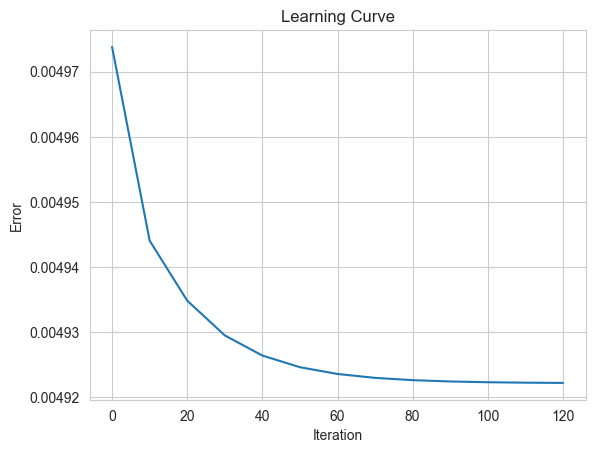

Optimized w: 0.0627, Optimized b: 0.0185


In [44]:
w, b, yplot, xplot = gradient_descent(x, y, w, b, alpha, num_iters)

print(f"Optimized w: {w.round(4)}, Optimized b: {b.round(4)}")

## Prediction Functionality

In [45]:
def predict(input):
    scale_input = input / 6244
    prediction_output = (scale_input * w) + b
    scaled_output = prediction_output * 298
    minutes = int(scaled_output)
    seconds = int((scaled_output - minutes) * 60)
    print(f"The Expected Delay in Departure Time is: {minutes} minutes {seconds} seconds")

    closest_value_index = (df['Flight Distance'] - input).abs().idxmin()

    closest_row = df.loc[closest_value_index]
    print()
    print()
    print('Closest Historical Value:')
    print()
    print(closest_row[['Departure Delay in Minutes', 'Flight Distance']])

## Employing the Model

In [46]:
# the number in brackets represents your input for the flight distance
predict(1000)

The Expected Delay in Departure Time is: 8 minutes 30 seconds


Closest Historical Value:

Departure Delay in Minutes       0.0
Flight Distance               1004.0
Name: 103743, dtype: float64
